### **Plotting in Python using matplotlib.pyplot**

In [2]:
# Set-up
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Upload all data files - must be on local computer
# Cities.csv, Countries.csv, Players.csv, Teams.csv, Titanic.csv
# If running notebook on local computer:
#   No need to run this cell (it will generate an error)
#   Make sure data files are in same workspace as notebook
from google.colab import files
uploaded = files.upload()

Saving Cities.csv to Cities.csv
Saving Countries.csv to Countries.csv
Saving Players.csv to Players.csv
Saving Teams.csv to Teams.csv
Saving Titanic.csv to Titanic.csv


### Plotting from Python data structures

In [4]:
# Read Cities.csv and Countries.csv into lists of dictionaries
citiesList = []
with open('Cities.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        citiesList.append(r)
countriesList = []
with open('Countries.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        countriesList.append(r)

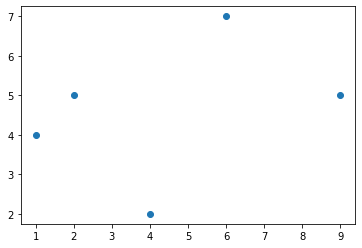

In [5]:
# Introduction to scatterplots
x = [1, 2, 4, 6, 9]
y = [4, 5, 2, 7, 5]
plt.scatter(x, y)
plt.show()

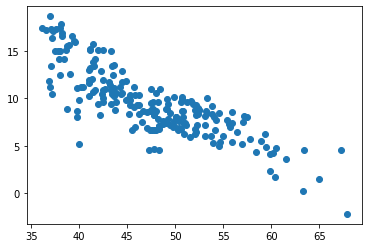

In [6]:
# Scatterplot of temperature (y) versus latitude (x)
x = []
y = []
for city in citiesList:
    x.append(float(city['latitude']))
    y.append(float(city['temperature']))
plt.scatter(x, y)
plt.show()
# Add labels to axes
# plt.xlabel('latitude')
# plt.ylabel('temperature')

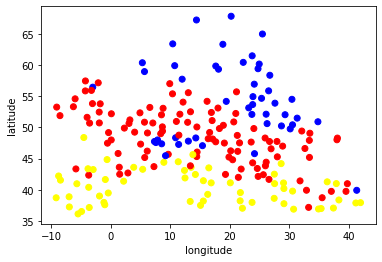

In [7]:
# Scatterplot of latitude (y) versus longitude (x) colored by temperature
x = []
y = []
colors = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    if float(city['temperature']) < 7:
        colors.append('blue')
    elif float(city['temperature']) < 11:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

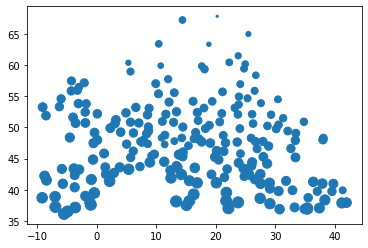

In [8]:
# Scatterplot of latitude (y) versus longitude (x) sized by temperature
x = []
y = []
size = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    size.append((float(city['temperature'])+3)*6) # +3 to avoid negative numbers
plt.scatter(x, y, size)
plt.show()

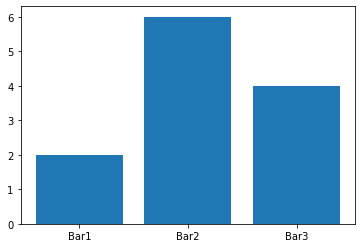

In [9]:
# Introduction to bar charts
bars = ['Bar1', 'Bar2', 'Bar3']
heights = [2, 6, 4]
plt.xticks([0,1,2], bars)
plt.bar([0,1,2], heights)
plt.show()

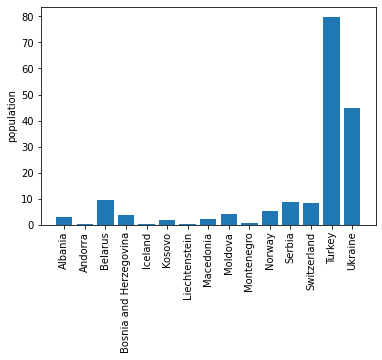

In [13]:
# Bar chart showing populations of non-EU countries
bars = []
heights = []
for country in countriesList:
    if country['EU'] == 'no':
        bars.append(country['country'])
        heights.append(float(country['population']))
ticks = list(range(len(bars))) # produces [0,1,...,n-1] for n bars
# print(ticks)
plt.xticks(ticks, bars, rotation='vertical')
plt.bar(ticks, heights)
plt.ylabel('population')
plt.show()

In [ ]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

In [ ]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
numNotEU = 0
for country in countriesList:
    if country['EU'] == 'yes': numEU += 1
    else: numNotEU +=1
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### Plotting from pandas dataframes

In [ ]:
# Read Cities.csv and Countries.csv into dataframes
f = open('Cities.csv')
citiesDF = pd.read_csv(f)
f = open('Countries.csv')
countriesDF = pd.read_csv(f)

In [ ]:
# Scatterplot of temperature (y) versus latitude (x)
citiesDF.plot.scatter(x='latitude', y='temperature')
plt.show()
# Show removing x and y

In [ ]:
# Bar chart showing populations of non-EU countries
countriesDF[countriesDF.EU == 'no'].plot.bar(x='country', y='population')
plt.show()

In [ ]:
# Pie chart showing number of EU countries versus non-EU countries
# No convenient plotting direct from dataframe
numEU = len(countriesDF[countriesDF.EU == 'yes'])
numNotEU = len(countriesDF[countriesDF.EU == 'no'])
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### <font color="green">**Your Turn: World Cup Data**</font>

In [14]:
# Read Players.csv and Teams.csv into data structures and dataframes
# Use whichever one you prefer for plotting
# Lists of dictionaries
playersList = []
with open('Players.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        playersList.append(r)
teamsList = []
with open('Teams.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        teamsList.append(r)
# Dataframes
f = open('Players.csv')
playersDF = pd.read_csv(f)
f = open('Teams.csv')
teamsDF = pd.read_csv(f)

In [23]:
teamsDF

,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,Brazil,1,5,3,1,1,9,4,7,2
1,Spain,2,6,5,0,1,7,2,3,0
2,Portugal,3,4,1,2,1,7,1,8,1
3,Netherlands,4,6,6,0,0,12,5,15,0
4,Italy,5,3,0,2,1,4,5,5,0
5,Germany,6,6,4,0,2,13,3,8,1
6,Argentina,7,5,4,0,1,10,6,7,0
7,England,8,4,1,2,1,3,5,6,0
8,France,9,3,0,1,2,1,4,6,1
9,Greece,13,3,1,0,2,2,5,5,0


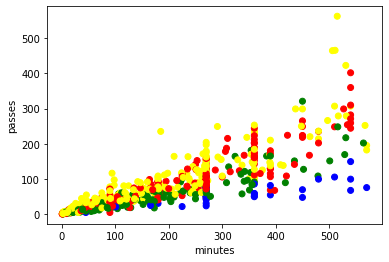

In [22]:
# Create a scatterplot of players showing passes made (y-axis)
# versus minutes played (x-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).
x = []
y = []
colors = []
for player in playersList:
    x.append(int(player['minutes']))
    y.append(int(player['passes']))
    if player['position'] == 'goalkeeper':
        colors.append('blue')
    elif player['position'] == 'defender':
        colors.append('red')
    elif player['position'] == 'midfielder':
        colors.append('yellow')
    else:
        colors.append('green')
plt.xlabel('minutes')
plt.ylabel('passes')
plt.scatter(x, y, c=colors)
plt.show()

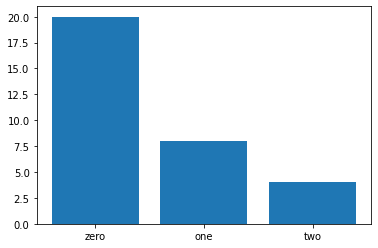

In [29]:
# Create a bar chart showing the number of teams with 0, 1, and 2 red cards
labels = ['zero', 'one', 'two'] # number of red cards
values = [0, 0, 0] # number of teams with zero/one/two red cards
for team in teamsList:
  values[int(team['redCards'])] += 1
plt.xticks([0,1,2], labels)
plt.bar([0,1,2], values)
plt.show()

### <font color="green">**Your Turn Extra: Titanic Data**</font>

In [ ]:
# Read Titanic.csv into data structure and dataframe
# Use whichever one you prefer for plotting
# List of dictionaries
titanicList = []
with open('Titanic.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        titanicList.append(r)
# Dataframe
f = open('Titanic.csv')
titanicDF = pd.read_csv(f)

In [ ]:
# For passengers in 3rd class, create a scatterplot of fare (y-axis)
# versus age (x-axis). Don't worry about missing ages.
# NOTE:'class' is a function in Pandas, so 'titanic.class' will generate
# an error; use 'titanic['class'] instead
YOUR CODE HERE

In [ ]:
# Create a bar chart showing the average fare paid by passengers in each class.
# The three bars should be labeled 'first', 'second', 'third'.
YOUR CODE HERE

In [ ]:
# Create a pie chart showing the relative number of male survivors, male
# non-survivors, female survivors, and female non-survivors (four slices).
YOUR CODE HERE